In [23]:
library(data.table)
library(ggplot2)

In [24]:
cellranger_dir_gwccg = "/directflow/GWCCGPipeline/projects/deliver/GIMR_GWCCG_230201_JOSPOW_10x_Tenk10k/"
cellranger_dir_sccg = "/directflow/SCCGGroupShare/projects/data/experimental_data/projects/TenK10K/GencodeV44/"

In [25]:
all_transferred_samples = list.files(cellranger_dir_sccg, pattern = "S.")
length(all_transferred_samples)
# all_transferred_samples

[1] 257

In [26]:
# use cellbender results just to get all samples in one place
cellbender_dir_anna = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/cellbender_output_smaller_learning_rate/"
cellbender_dir_blake = "/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/cellbender/output/smaller_learning_rate/"
samples_anna = list.files(cellbender_dir_anna, pattern = "S.")
samples_blake = list.files(cellbender_dir_blake, pattern = "S.")
samples = unique(c(samples_anna, samples_blake))
samples = samples[order(samples)]
length(samples)
# samples

[1] 300

In [27]:
cellranger_folders = list.files(cellranger_dir_gwccg, pattern = "tenk10k_gencode44")
cellranger_folders

[1] "231013_tenk10k_gencode44" "231213_tenk10k_gencode44"
 [3] "231214_tenk10k_gencode44" "240108_tenk10k_gencode44"
 [5] "240112_tenk10k_gencode44" "240115_tenk10k_gencode44"
 [7] "240116_tenk10k_gencode44" "240119_tenk10k_gencode44"
 [9] "240214_tenk10k_gencode44" "240223_tenk10k_gencode44"
[11] "240319_tenk10k_gencode44" "240501_tenk10k_gencode44"
[13] "240524_tenk10k_gencode44" "240530_tenk10k_gencode44"

In [28]:
df_to_plot = data.frame()
for (sample in samples){
    if (sample %in% all_transferred_samples){
        cellranger_metrics_file = paste0(cellranger_dir_sccg,sample,"/outs/metrics_summary.csv")
        cellranger_df = fread(cellranger_metrics_file)
    } else { 
        for (cellranger_folder in cellranger_folders){
            cellranger_metrics_file = paste0(cellranger_dir_gwccg,cellranger_folder,"/cellranger_outs/",sample,"/cellranger_count/",sample,"/outs/metrics_summary.csv")
            if (file.exists(cellranger_metrics_file)){cellranger_df = fread(cellranger_metrics_file)}
        }
    }
    colnames(cellranger_df) = gsub(" ","_",colnames(cellranger_df))
    cellranger_ncells = as.numeric(gsub(",","",cellranger_df$Estimated_Number_of_Cells))
#     print(c(sample, cellranger_ncells))
    df_to_plot = rbind(df_to_plot, data.frame(sample=sample, 
                                              cellranger_ncells=cellranger_ncells))
}
df_to_plot$pool = gsub("a","",gsub("b","",gsub("c","",df_to_plot$sample)))

In [29]:
head(df_to_plot)

,sample,cellranger_ncells,pool
,<chr>,<dbl>,<chr>
1,S0001a,31524,S0001
2,S0001b,32419,S0001
3,S0001c,30546,S0001
4,S0002a,22218,S0002
5,S0002b,21849,S0002
6,S0002c,21925,S0002


In [30]:
df_to_plot1 = df_to_plot[1:122,]
df_to_plot2 = df_to_plot[123:240,]
df_to_plot3 = df_to_plot[241:nrow(df_to_plot),]

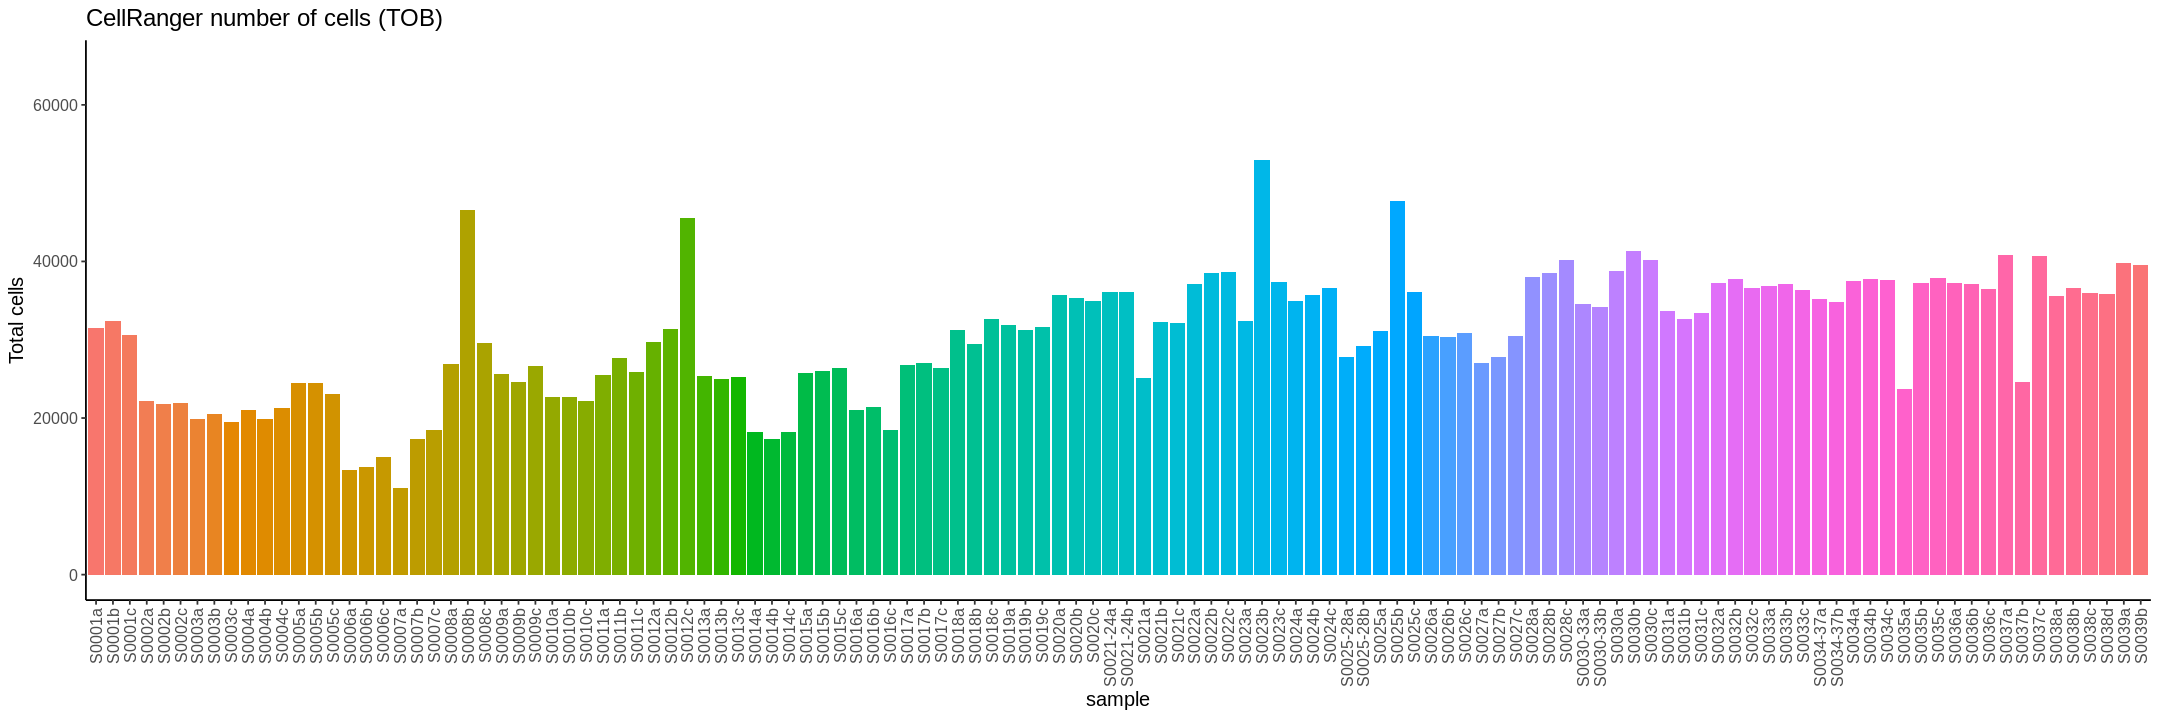

In [45]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_to_plot1, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12)) + ylim(c(0,65000))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p1 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (TOB)")
p1

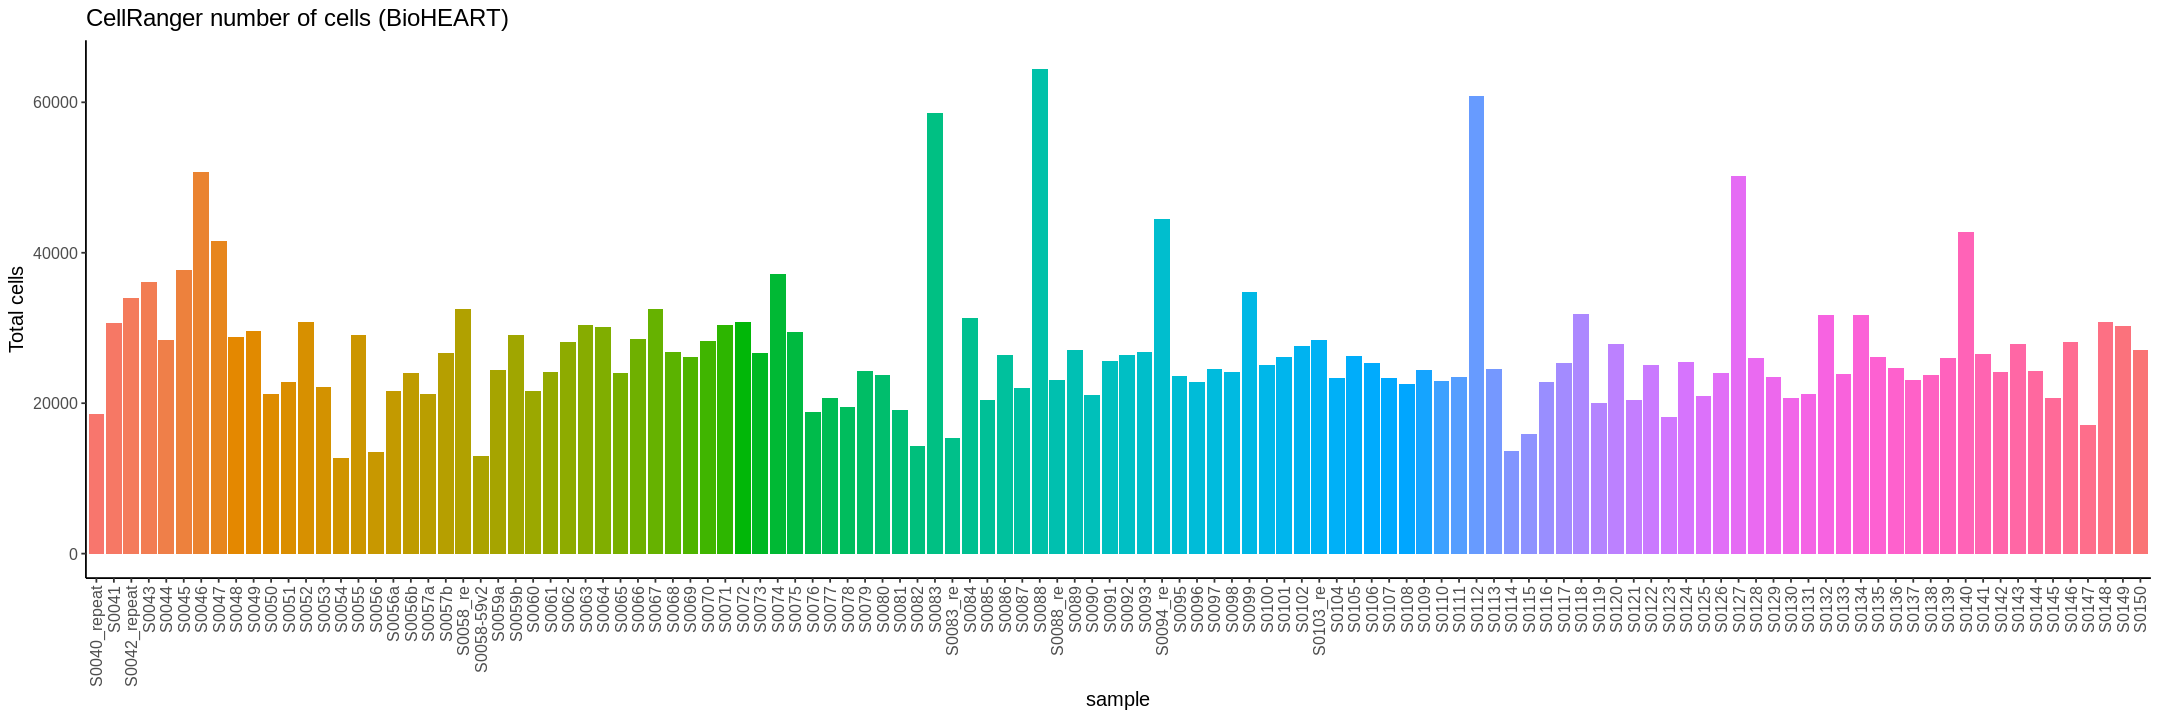

In [46]:
p = ggplot(df_to_plot2, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12)) + ylim(c(0,65000))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p2 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (BioHEART)")
p2

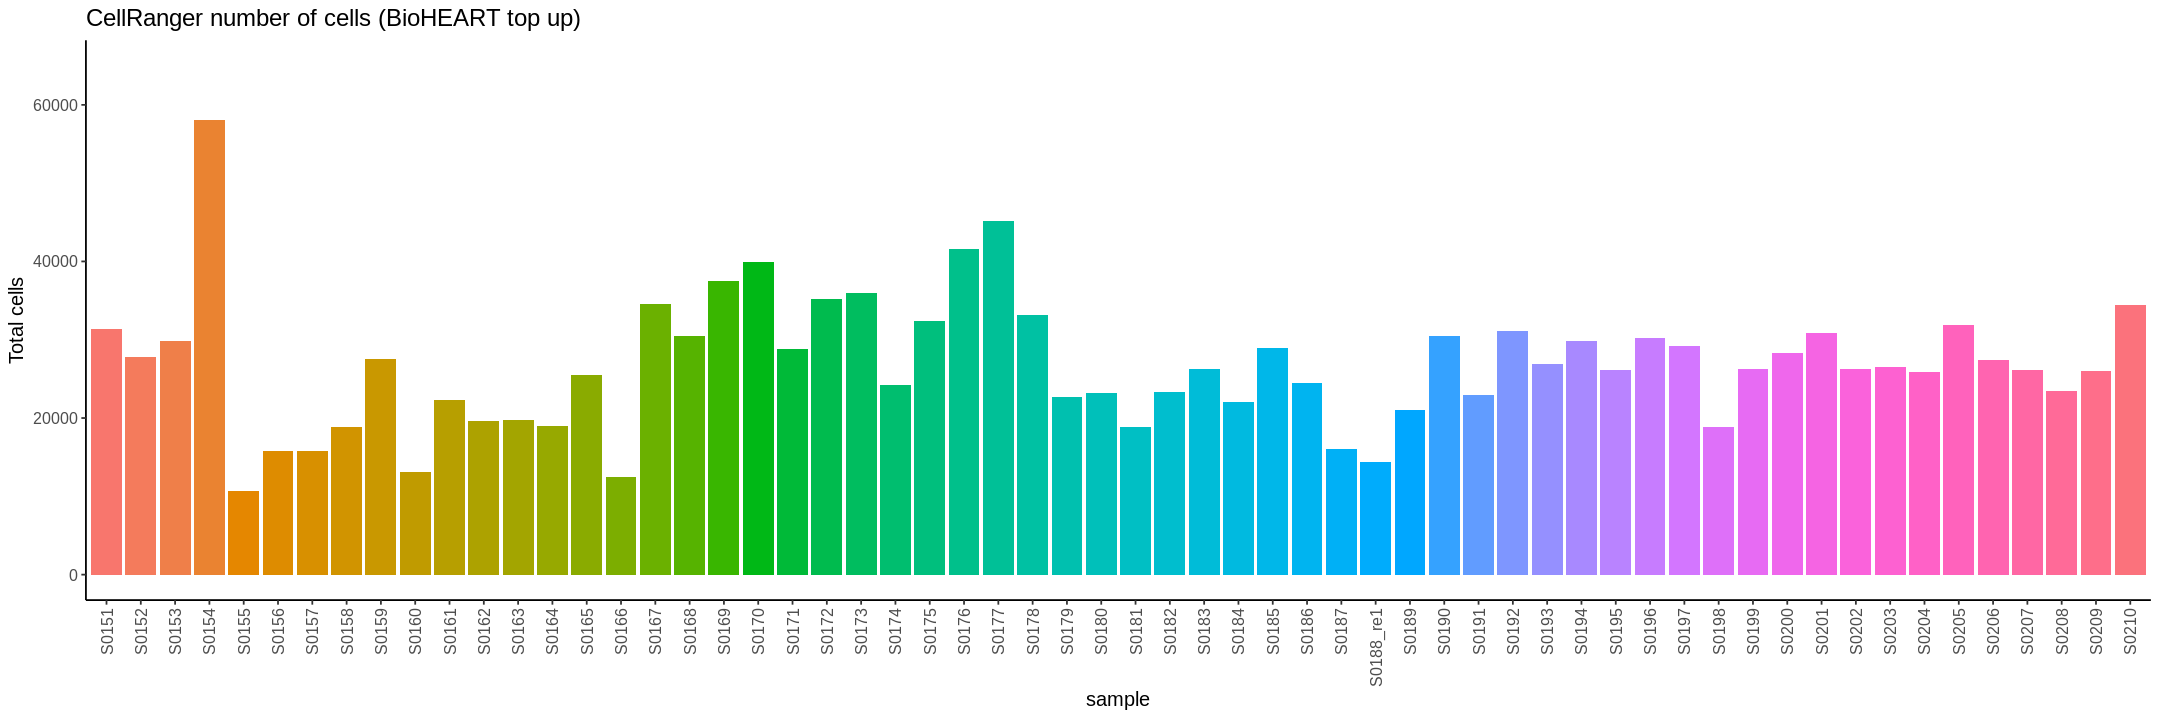

In [47]:
p = ggplot(df_to_plot3, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12)) + ylim(c(0,65000))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p3 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (BioHEART top up)")
p3

In [48]:
df_to_save = df_to_plot
# df_to_save$cellbender_ncells <- c()
df_to_save$cohort = "TOB"
df_to_save$cohort[123:nrow(df_to_save)] = "BioHEART"
head(df_to_save)

,sample,cellranger_ncells,pool,cohort
,<chr>,<dbl>,<chr>,<chr>
1,S0001a,31524,S0001,TOB
2,S0001b,32419,S0001,TOB
3,S0001c,30546,S0001,TOB
4,S0002a,22218,S0002,TOB
5,S0002b,21849,S0002,TOB
6,S0002c,21925,S0002,TOB


In [49]:
fwrite(df_to_save, "/share/ScratchGeneral/anncuo/tenk10k/data_processing/cellranger_ncells_summary.csv")

In [50]:
mean(df_to_save$cellranger_ncells)

[1] 28329.23

In [51]:
mean(df_to_save[df_to_save$cohort == "TOB",]$cellranger_ncells)
mean(df_to_save[df_to_save$cohort == "BioHEART",]$cellranger_ncells)

[1] 30527

[1] 26822.9

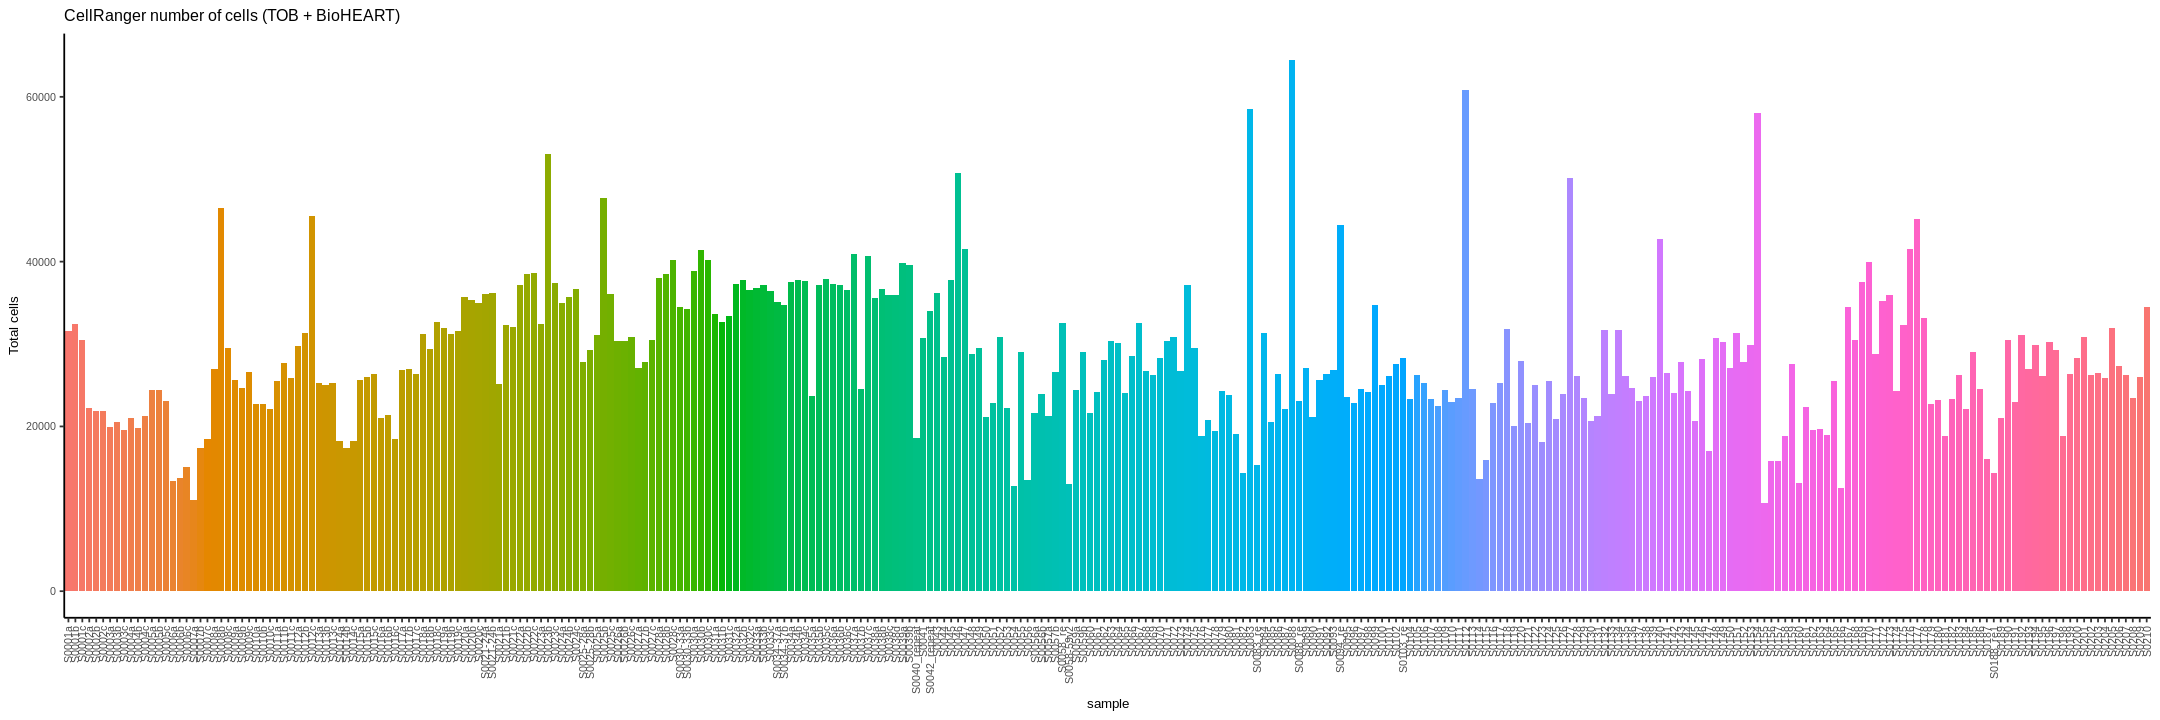

In [54]:
p = ggplot(df_to_plot, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=8)) 
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p4 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (TOB + BioHEART)")
p4